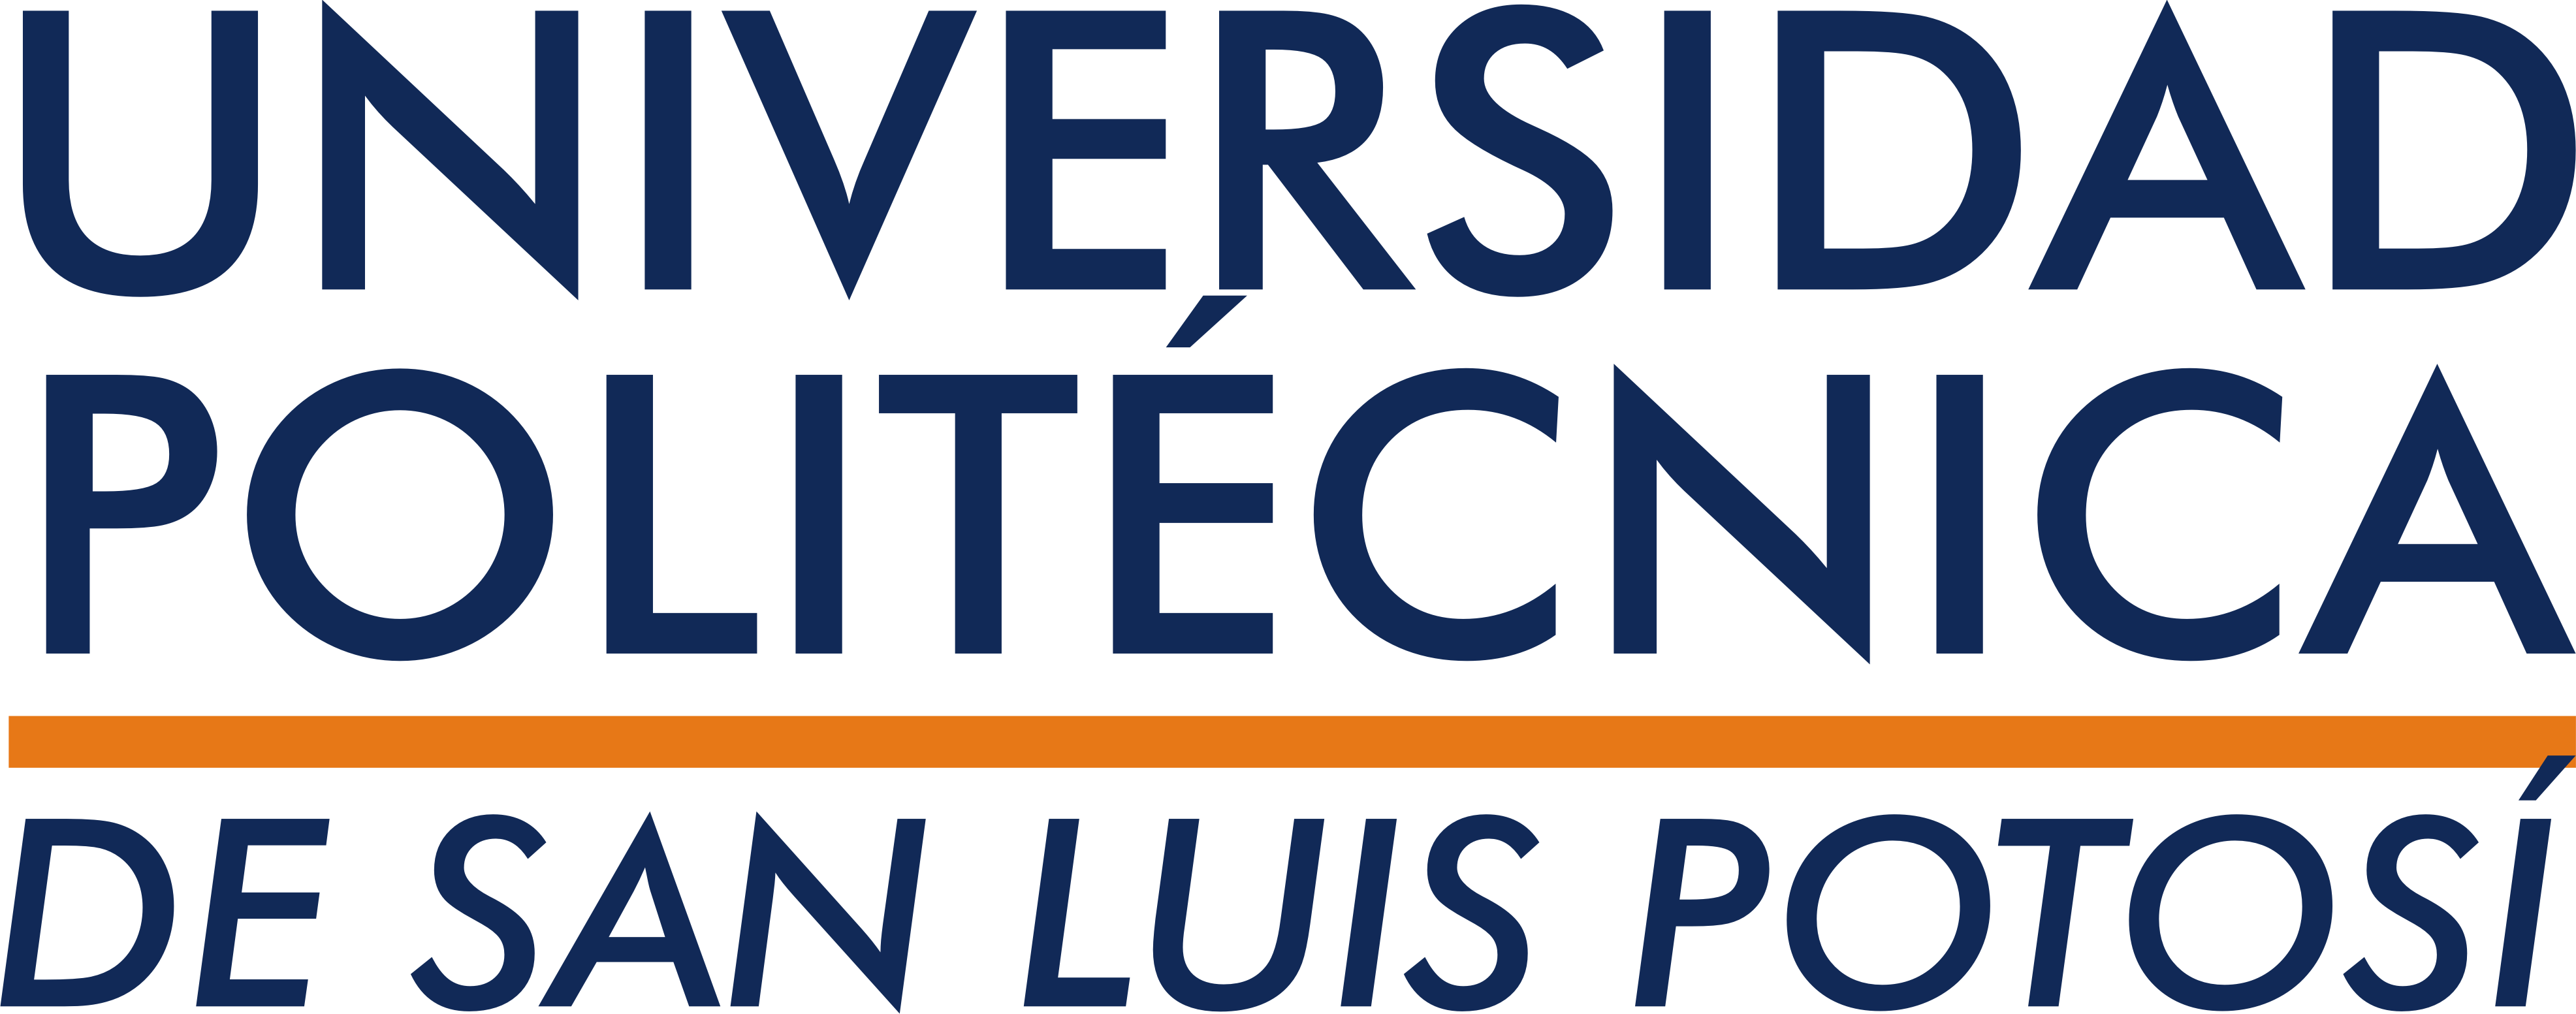

# Universidad Politécnica de San Luis Potosí
## Inteligencia Artificial II - Proyecto Final

**Integrantes**:
* Brayan Adrian Galván Flores - 181112
* Richard Ramon Garcia - 171113
* Juana López Garcia - 170854
* Nadia Paulina Delgado Avila - 170824
* Carlos Alfonso Hernandez Rojas - 170170

**PUNTOS A DESARROLLAR**
1.	Leer una URL de algún sitio de noticias y extraer las notas de las mismas.

2. Leer una palabra o frase a buscar en las notas extraídas. (por ejemplo: UPSLP, Universidad Politécnica de San Luis Potosí.

3. Listar los títulos de las noticias donde aparece la palabra en orden de relevancia.

4. Realizar el resumen textual extractivo de las noticias más relevantes. 


#  INSTALACIONES

In [ ]:
!pip install --user -U nltk    # Instala nltk: The Natural Language Toolkit (NLTK) is a Python package for natural language processing. NLTK requires Python 3.7
!pip install sentence_splitter # Instala sentence_splitter: Divisor de texto a oración usando algoritmo heurístico por Philipp Koehn y Josh Schroeder.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# LIBRERIAS

In [ ]:
# PASO 1.1 - IMPORTAR LIBRERIAS
import os    # Este módulo provee funcionalidades del sistema operativo.
import nltk  # Bibliotecas para el lenguaje natural
import errno # Detecta errores
import requests
import pandas as pd # Conjunto de herramientas para operaciones de tablas y el análisis de datos
import collections  # Permite utilizar los diferentes tipos de datos en contenedores
from bs4 import BeautifulSoup # Extraer datos de la pagina en html
from sentence_splitter import SentenceSplitter   # SentenceSplitter: Divisor de texto a oración usando algoritmo heurístico, permite dividir párrafos de texto en oraciones.
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# FUNCIONES

In [ ]:
# FUNCIÓN TOKENIZAR
    # Pasos para tokenizar
        # 1. Limpiar el texto
        # 2. Tokenizar - Cambiar esos simbolos por " "
        # 3. Regresa una lista de tokens

# Funcion: Tokenizar(lista) --> Return lista
def tokenizar(texto):
    puntuacion = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~¿¡'
    tokens = nltk.word_tokenize(texto,"spanish")          # 1era vez: word_tokenize -> Extrae tokens de una cadena y regresa las silabas de una sola palabra
    for i,token in enumerate(tokens):
        tokens[i] = token.strip(puntuacion)               # strip -> Remueves los caracteres de puntuación en tokens[i]
    texto = " ".join(tokens)                              # join -> Toma todos los elementos en un iterable y los une en una sola variable
    tokens = nltk.word_tokenize(texto,"spanish")          # 2da vez: word_tokenize
    return tokens

# PARTE 1 - OBTENER DATOS 

In [ ]:
# PASO 1.1 - INGRESAR URL
url = "https://pulsoslp.com.mx/"

In [ ]:
# PASO 1.2 - SOLICITAR LOS DATOS
req = requests.get(url)
# PASO 1.3 - OBTENER CODIGO HTML PAGINA PRINCIPAL
soup = BeautifulSoup(req.text) # Obtiene todo el HTML del sitio
# PASO 1.4 - OBTENER TITULO PAGINA PRINCIPAL
title = soup.find("title")
# PASO 1.5 - OBTENER TEXTO PAGINA PRINCIPAL
textoP = soup.find("div",{"class":"td-container td-post-template-default out"})

In [ ]:
# PASO 1.6 - OBTENER PAGINAS
paginas = []
for link in textoP.find_all("a"):
    cadena = link.get("href")
    paginas.append(cadena)

In [ ]:
# PASO 1.7 - ELIMINAR DUPLICADO Y DATOS INECESARIOS
enlaces = []
for pagina in paginas:
    if pagina not in enlaces:
        if not (pagina.startswith("https://")|pagina.startswith(" https://")):
            enlaces.append(pagina)

In [ ]:
# PASO 1.8 - CREAR CARPETA
try:
    os.mkdir("/content/NotasIA/")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

In [ ]:
# PASO 1.9 - OBTENER ENLACE
enlacesF = []
contador = 0
for enlace in enlaces:
    enlacesF.append("https://pulsoslp.com.mx"+enlace)

In [ ]:
# PASO 1.10 - OBTENER TEXTO DE LAS PAGINAS EN TXT
textos = []
for enlace in enlacesF:
    req = requests.get(enlace)        # Obtener el html de la pagina
    soup = BeautifulSoup(req.text)    # Obtener el texto de la pagina
    textos.append(soup.text)          # Agregar texto extraido a la lista textos
    titulos = soup.find("title").text # Obtener el titulo de la página
    
    try: # Crea archivos txt con la nota; el nombre del archivo es el titulo extraido de la nota
        file = open("/content/NotasIA/"+titulos+".txt","w")
        file.write(soup.text)         # Ingresa el texto de la nota al archivo txt
        file.close()
    except OSError as e: # Si ocurre algun error al intentar crear un archivo lo marca como excepcion para que no afecte a los demás
        print("Error en archivo: "+titulos)

# PARTE 2 - TOKENIZAR & BUSCAR PALABRA 

In [ ]:
# PASO 2.1 - OBTENEMOS LOS INDICES DE CADA DOCUMENTO (LISTAMOS LAS PALABRAS E INDICAMOS EN QUE ARCHIVOS APARECEN)
archivos = os.listdir("/content/NotasIA/") # Obtenemos la lista de todos los archivos y directorios en el directorio especificado 
indice = {} # Declaramos un indice
for archivo in archivos: # Recorremos
    with open("/content/NotasIA/"+archivo,"r") as entrada: # Recorremos para abrir los archivos
        texto = entrada.read() # Leemos el archivo
    tokens = tokenizar(texto) # Tokenizamos las palabras del texto
    vocabulario = set(tokens) # Los token los hacemos en una variable para guardarlo
    for palabra in vocabulario: # Ahora buscamos las palabras en el texto que tokenizamos
        if palabra not in indice: # Evaluamos que la palabra se encuentre en el indice de archivos
            indice[palabra] = set() # Si no se encuentra, entonces anexamos al indice la palabra
        indice[palabra].add(archivo) # Añadimos al indice el archivo que no se encuentra
indice # Imprimos en pantalla

{'entry-thumb': {' Aviso Legal | Pulso Diario de San Luis .txt',
  ' Contacto | Pulso San Luis .txt',
  ' Directorio  | Pulso San Luis .txt',
  ' Noticias al día | Pulso Diario de San Luis .txt',
  '125 años de avistamientos ovnis en una exposición .txt',
  'AMLO insistirá en crear un bloque comercial de toda América .txt',
  'Absuelven a profe violador .txt',
  'Aeropuerto de las Huastecas, en riesgo de no concretarse: Gallardo .txt',
  'Alemania, érase una vez una selección de la elite .txt',
  'Alexa Moreno afirma que ha pensado dos veces en dejar la gimnasia .txt',
  'Ante falta de puente, usan escalera para salir de Tantizohuiche .txt',
  'Ante posible desafuero, Alito se engalla: votaremos contra reforma .txt',
  'Arranca Gallardo posadas navideñas .txt',
  'Arte y gastronomia se conjugan en homenaje a Picasso en Miami .txt',
  'Aumento al salario mínimo en México ayudará a combatir la informalidad: AMECH .txt',
  'Automóviles Ferrari se convierten en obras de arte en exhibición 

In [ ]:
# PASO 2.2 - INGRESAMOS LA PALABRA/FRASE A BUSCAR
frase = input("Ingrese una palabra/frase a buscar > ")

Ingrese una palabra/frase a buscar > Dan a conocer


In [ ]:
# PASO 2.3 - OBTENER PALABRA/FRASE SEPARADA (en una lista) POR ESPACIOS
fraseSep = frase.split(' ') 
print(fraseSep)

['Dan', 'a', 'conocer']


In [ ]:
# PASO 2.4 - OBTENEMOS UNA LISTA DE LOS ARCHIVOS DONDE SE ENCUENTRE LA PRIMERA PALABRA INGRESADA
textosEvaluar = []
try: # Si la primera palabra se encuentra, agregamos los archivos en donde se encuentra a una lista
    for textfinal in indice[fraseSep[0]]:
        textosEvaluar.append(textfinal)
except KeyError: # Si la palabra no se encuentra, indicamos que no se encuentra
    print(f"La palabra: {fraseSep[0]}' no se encuentra en ningun documento.")

In [ ]:
print(textosEvaluar)

['Dan a conocer los vehículos más inseguros en México .txt', ' Noticias al día | Pulso Diario de San Luis .txt']


In [ ]:
# PASO 2.5 - REALIZAR UNA LISTA DE LOS ARCHIVOS DONDE APARCE EL DOCUMENTO
notasFin = []   #Definimos un arreglo para almacenar los archivos creados
fraseFin = " ".join(fraseSep) 
if len(fraseSep) > 1: #Evaluamos que si el arreglo tiene solo 1 archivo entonces realice esta sentencia
    for notas in textosEvaluar: #Recorremos con un for los archivos en el arreglo
        with open("/content/NotasIA/"+notas,"r") as entrada: #Abrimos el archivo 
            texto = entrada.read() #Leemos el contenido del archivo seleccionado}
            contador = 0 #Inicializamos un contados
            if(texto.find(fraseFin)!=-1): #Evaluamos las palabras/frases a buscar en el archivo
                print("La frase se encuentra en: "+notas) #Mensaje de salida
                notasFin.append(notas) #Agregamos al arreglo las notas
else: #Si hay mas de un archivo, entra en esta sentencia
    notasFin = textosEvaluar #Igualamos los archivos del arreglo para evaluar el archivo que contenga la palabra a buscar
    print("La palabra se encuentra en: ") #Mensaje de salida
    print(notasFin) #Impresion en pantalla

La frase se encuentra en: Dan a conocer los vehículos más inseguros en México .txt
La frase se encuentra en:  Noticias al día | Pulso Diario de San Luis .txt


# PARTE 3 - LISTAR LAS NOTAS POR RELEVANCIA

In [ ]:
textUF = "" #Inicializamos un cabezal
contador = 0 #Inicializamos el contador 
contadorArchivos = [] #Generamos el arreglo que cuenta cuantos archivos hay.
print(notasFin)
if len(notasFin) == 1:
    print("Solo un documento > La relevancia es en: "+notasFin[0])
    with open("/content/NotasIA/"+notasFin[0],"r") as entrada:
            textUF = entrada.read()
else:
    print("Mas de un documentos")
    # Contar palabras en cada uno de los documentos (las palabras deben ser relacionadas con las que ingreso el usuario 
    # y así es como se le da un orden de relevancia a los documento)
    for notas in notasFin:
        contador = 0
        with open("/content/NotasIA/"+notas,"r") as entrada:
            if fraseFin in notas:
                contador += 1
        contadorArchivos.append(contador)
        #Insertar los datos aqui

['Dan a conocer los vehículos más inseguros en México .txt', ' Noticias al día | Pulso Diario de San Luis .txt']
Mas de un documentos


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #Mandamos a llamar a la funcion para vectorizar los token

In [ ]:
lista_archivos = ["/content/NotasIA/"+archivo for archivo in notasFin] # Listamos los archivos existentes dentro de un directorio de lectura
vectorizador = TfidfVectorizer(input="filename",analyzer="word",sublinear_tf=True) # Vectorizamos utilizando esta linea de comando 
matriz_tfidf = vectorizador.fit_transform(lista_archivos) # Utilizamos el vectorizador de la linea anterior y la aplicamos al arreglo de archivos
vocabulario = vectorizador.get_feature_names() # Generamos un vocabulario de archivos vectorizados
tabla_tfidf = pd.DataFrame(matriz_tfidf.toarray(),index=notasFin,columns=vocabulario) #Sacamos mediante un dataframe las frecuencias que se repiten unas palabras en N archivos
tabla_tfidf

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


00       000  \
Dan a conocer los vehículos más inseguros en Mé...  0.040977  0.000000   
 Noticias al día | Pulso Diario de San Luis .txt    0.000000  0.017091   

                                                          01       011  \
Dan a conocer los vehículos más inseguros en Mé...  0.013893  0.013893   
 Noticias al día | Pulso Diario de San Luis .txt    0.035823  0.031731   

                                                          02        04  \
Dan a conocer los vehículos más inseguros en Mé...  0.000000  0.013893   
 Noticias al día | Pulso Diario de San Luis .txt    0.088169  0.012160   

                                                         05     0_d55  \
Dan a conocer los vehículos más inseguros en Mé...  0.03306  0.013893   
 Noticias al día | Pulso Diario de San Luis .txt    0.00000  0.012160   

                                                    0cbedb97083403b68651bdd2ab19a8e1d1d28cbe  \
Dan a conocer los vehículos más inseguros en Mé...                                  0.000000   
 Noticias al día | Pulso Diario de San Luis .txt                                    0.017091   

                                                         0px  ...  zona_4_not  \
Dan a conocer los vehículos más inseguros en Mé...  0.044418  ...    0.019526   
 Noticias al día | Pulso Diario de San Luis .txt    0.031731  ...    0.000000   

                                                    zona_5_der  \
Dan a conocer los vehículos más inseguros en Mé...    0.019526   
 Noticias al día | Pulso Diario de San Luis .txt      0.000000   

                                                    zona_nota_especial  \
Dan a conocer los vehículos más inseguros en Mé...            0.019526   
 Noticias al día | Pulso Diario de San Luis .txt              0.000000   

                                                    zona_znslp     zorro  \
Dan a conocer los vehículos más inseguros en Mé...    0.019526  0.000000   
 Noticias al día | Pulso Diario de San Luis .txt      0.000000  0.017091   

                                                      álgido     ángel  \
Dan a conocer los vehículos más inseguros en Mé...  0.000000  0.019526   
 Noticias al día | Pulso Diario de San Luis .txt    0.017091  0.000000   

                                                     árboles      área  \
Dan a conocer los vehículos más inseguros en Mé...  0.000000  0.000000   
 Noticias al día | Pulso Diario de San Luis .txt    0.017091  0.017091   

                                                       érase  
Dan a conocer los vehículos más inseguros en Mé...  0.000000  
 Noticias al día | Pulso Diario de San Luis .txt    0.017091  

[2 rows x 2013 columns]

In [ ]:
tabla_tfidf[fraseSep].sum(axis=1).sort_values(ascending=False).head(20)  #Listamos las palabras que se repiten en los archivos especificados.

KeyError: ignored

# PARTE 4 - RESUMEN

In [ ]:
if len(notasFin) == 1: # Aplicar resumen sí solo se tiene un documento
  resumen = ""
  # PASO 1 - CREAR INSTANCIA DE SENTENCESPLITTER
  splitter = SentenceSplitter(language = 'es')
  # PASO 2 - LEER TEXTO
  texto = textUF
  # PASO 3 - DIVIDIR EL TEXTO EN ORACIONES
  texto = splitter.split(text = texto)
  # PASO 4 - CREAR UNA INSTANCIA DE TFIDFVECTORIZER
  vectorizer = TfidfVectorizer()
  X = vectorizer.fit_transform(texto)                 # Ajusta el conjunto X para obtener el valor TF-IDF
  vocabulario = vectorizer.get_feature_names_out()    # Convertir el texto en una matriz de funciones TF-IDF
  tabla_tfidf = pd.DataFrame(X.toarray(), index = texto, columns = vocabulario) # Genera una tabla de valorres TF-IDF
  # PASO 5 - CALCULAR PROMEDIOS POR ORACIONES
  promedio = tabla_tfidf.mean(axis=1)
  # PASO 6 - FORMATO Y ORDEN
  # Estas líneas de código solamente permiten tener una vista más ordenada de las sentencias y sus promedios
  promedio = pd.DataFrame(X.toarray(), columns = vocabulario).mean(axis=1)
  tabla_prom = pd.DataFrame({'sentencia': texto})
  tabla_prom['promedio'] = promedio
  importancia = tabla_prom.sort_values('promedio', ascending = False)
  importancia
  # PASO 7 - RESUMEN
  resumen += importancia['sentencia'].iloc[1]
  resumen += importancia['sentencia'].iloc[2]
  print(resumen)
else: 
  resumenT = []
  splitter = SentenceSplitter(language = 'es')
  # PASO 2 - LEER TEXTO
  for notas in notasFin:
    with open("/content/NotasIA/"+notas,"r") as entrada:
      resumen = ""
      texto = entrada.read()
      # PASO 3 - DIVIDIR EL TEXTO EN ORACIONES
      texto = splitter.split(text = texto)
      # PASO 4 - CREAR UNA INSTANCIA DE TFIDFVECTORIZER
      vectorizer = TfidfVectorizer()
      X = vectorizer.fit_transform(texto)                 # Ajusta el conjunto X para obtener el valor TF-IDF
      vocabulario = vectorizer.get_feature_names_out()    # Convertir el texto en una matriz de funciones TF-IDF
      tabla_tfidf = pd.DataFrame(X.toarray(), index = texto, columns = vocabulario) # Genera una tabla de valorres TF-IDF
      # PASO 5 - CALCULAR PROMEDIOS POR ORACIONES
      promedio = tabla_tfidf.mean(axis=1)
      # PASO 6 - FORMATO Y ORDEN
      # Estas líneas de código solamente permiten tener una vista más ordenada de las sentencias y sus promedios
      promedio = pd.DataFrame(X.toarray(), columns = vocabulario).mean(axis=1)
      tabla_prom = pd.DataFrame({'sentencia': texto})
      tabla_prom['promedio'] = promedio
      importancia = tabla_prom.sort_values('promedio', ascending = False)
      print(importancia)
      # PASO 7 - RESUMEN
      resumen += importancia['sentencia'].iloc[3]
      resumen += importancia['sentencia'].iloc[4]
      resumenT.append(resumen)
      # Aplicar resumen sí se tiene más de un documento

Dos hombres que habían estado internados en el Centro Penitenciario de Tamazunchale, y quedaron en libertad, fueron asesinados a tiros frente a la cárcel. La Fiscalía de San Luis Potosí confirmó esta tarde el hecho, y dio a conocer que tomó conocimiento y abrió carpeta de investigación por el deceso de dos personas cerca del penal del municipio de Tamazunchale. Según los reportes preliminares, se trata de dos hombres que sufrieron el ataque poco después de que salieron del citado Penal del Estado. Los peritos de Servicios Periciales se presentaron al sitio de los hechos y levantaron indicios para integrar la carpeta de investigación correspondiente.El Servicio Médico Legal (SEMELE), dependiente de la Vicefiscalía Científica, acudió al sitio del suceso e implementó el protocolo de levantamiento de cuerpos, a fin de trasladarlos para realizar las necropsias correspondientes.Además, agentes de la Policía de Investigación (PDI) iniciaron con entrevistas y trabajos de inteligencia para dete

In [ ]:
# PASO 8 - MOSTRAMOS LAS PARTES MÁS IMPORTANTES DE CADA TEXTO
cont = 0
for notas in notasFin:
  print(notas)          # Genera el título de cada uno de los archivos
  print(resumenT[cont]) # Muestra el resumen
  print()               # Salto de línea
  print()               # Salto de línea
  cont += 1

Matan a balazos a dos hombres al salir del penal de Tamazunchale .txt


NameError: ignored